word bank


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


In [6]:
# Step 1: Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X = mnist['data']
y = mnist['target'].astype(int)

c:\Users\MALIK AHSAN SAJJAD\anaconda3\envs\chatbot_env\lib\site-packages\sklearn\datasets\_openml.py:110: UserWarning: A network error occurred while downloading https://api.openml.org/data/v1/download/52667. Retrying...
  warn(


In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# Step 3: Apply PCA
n_components= 50
pca = PCA (n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [17]:
classifier = LogisticRegression(random_state=42, max_iter=2000)

In [18]:

# Step 5: Train a classifier (Logistic Regression)
classifier = LogisticRegression(max_iter=10000)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [20]:
# Evaluate the classifier
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1343
           1       0.94      0.97      0.96      1600
           2       0.90      0.89      0.89      1380
           3       0.88      0.87      0.87      1433
           4       0.91      0.91      0.91      1295
           5       0.86      0.85      0.85      1273
           6       0.94      0.95      0.95      1396
           7       0.92      0.92      0.92      1503
           8       0.87      0.84      0.85      1357
           9       0.89      0.88      0.88      1420

    accuracy                           0.91     14000
   macro avg       0.90      0.90      0.90     14000
weighted avg       0.91      0.91      0.91     14000



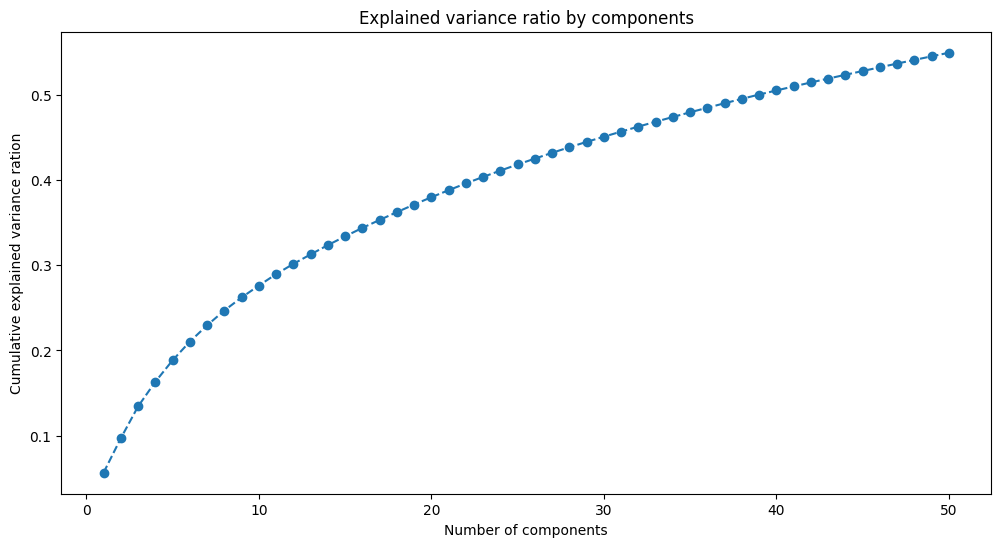

In [24]:
# Step 7: Plot the explained variance ratio (explained by each principal component)
plt.figure(figsize=(12,6))
plt.plot(range(1, n_components + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Explained variance ratio by components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance ration')
plt.show()


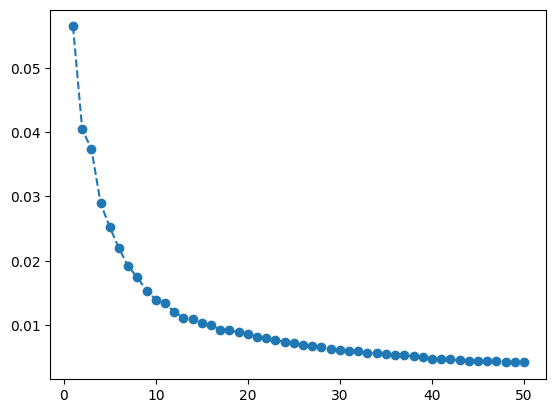

In [27]:
plt.figsize=(12,6)
plt.plot(range(1, n_components +1), pca.explained_variance_ratio_, marker='o', linestyle='--')

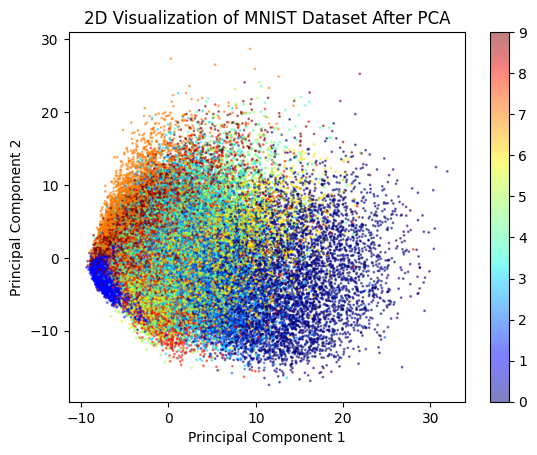

In [28]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='jet', alpha=0.5, s=1)
plt.title('2D Visualization of MNIST Dataset After PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()